# Analysis of recruiting data vs success outcomes

In [1]:
# import dependencies and read in needed data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

fbsRecruitingFrame = pd.read_csv("Data/fbsRecruitingData.csv")
fbsWinLossFrame = pd.read_csv("Data/fbsWinLossData.csv")
fbsWinLossFrame = fbsWinLossFrame[['season','team','games','wins','losses','ties','color']]

In [2]:
# combine data
comboFrame = pd.merge(fbsRecruitingFrame,fbsWinLossFrame, on= ['season','team','color'], how='outer')
comboFrame = comboFrame[comboFrame['conference'].isin(['ACC','Pac-10','Pac-12','Big Ten','SEC','Big 12'])]
comboFrame = comboFrame.replace('Pac-10','Pac-12')
comboFrame.conference.unique()

array(['SEC', 'Pac-12', 'Big 12', 'ACC', 'Big Ten'], dtype=object)

In [3]:
# create some percentage metrics to normalize data
comboFrame['winPct'] = comboFrame['wins']/comboFrame['games']*100

In [4]:
# get average recruiting rank and win percentage of each team
groupedTeam = comboFrame.groupby(['team','conference','color'])

groupedStats = pd.DataFrame({'avgPoints':groupedTeam['recruitingPoints'].sum()/groupedTeam['recruitingPoints'].count(),
                             'avgWinPct':groupedTeam['winPct'].sum()/groupedTeam['winPct'].count(),
                             'numSeasons':groupedTeam['winPct'].count()
                            })
groupedStats = groupedStats.reset_index()
groupedStats

,team,conference,color,avgPoints,avgWinPct,numSeasons
0,Alabama,SEC,#690014,283.966250,83.682984,16
1,Arizona,Pac-12,#002449,186.649375,47.800117,16
2,Arizona State,Pac-12,#942139,202.505000,57.553904,16
3,Arkansas,SEC,#9c1831,212.593750,48.983829,16
4,Auburn,SEC,#03244d,252.880000,68.815559,16
...,...,...,...,...,...,...
64,Wake Forest,ACC,#9E7E38,151.818750,46.813083,16
65,Washington,Pac-12,#2B2F64,208.059375,49.821533,16
66,Washington State,Pac-12,#94022a,172.148125,43.054341,16
67,West Virginia,Big 12,#FFC600,196.235000,58.049242,8


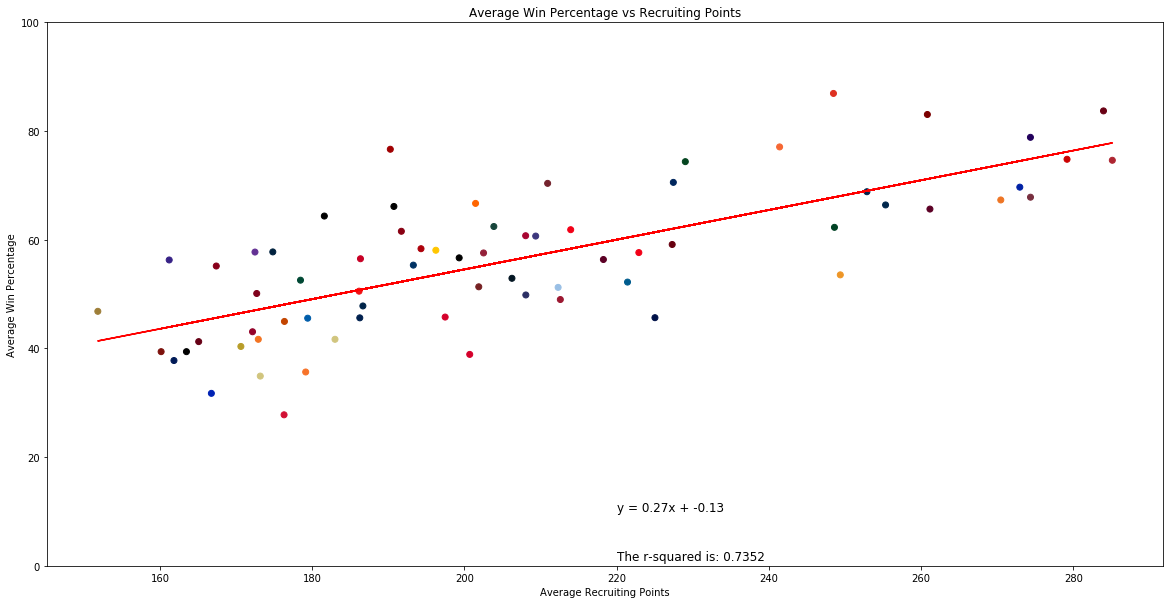

In [5]:
# create scatter/line plot of average win percentage vs average recruiting points
xvalues = groupedStats['avgPoints']
yvalues = groupedStats['avgWinPct']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedStats['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,10),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,1),fontsize=12,color="black")
plt.title('Average Win Percentage vs Recruiting Points')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average Win Percentage')
plt.ylim(0,100)
# save figure
plt.savefig("Figures/AverageWinPctVsRecruitingPts.png")

In [6]:
# bin the years
bins1 = [2003,2007,2011,2015,2019]
binlabels1 = ['2004-2007','2008-2011','2012-2015','2016-2019']

bins2 = [2004,2008,2012,2016]
binlabels2 = ['2005-2008','2009-2012','2013-2016']

bins3 = [2005,2009,2013,2017]
binlabels3 = ['2006-2009','2010-2013','2014-2017']

bins4 = [2006,2010,2014,2018]
binlabels4 = ['2007-2010','2011-2014','2015-2018']

comboFrame['bin1'] = pd.cut(comboFrame['season'],bins1,labels=binlabels1)
comboFrame['bin2'] = pd.cut(comboFrame['season'],bins2,labels=binlabels2)
comboFrame['bin3'] = pd.cut(comboFrame['season'],bins3,labels=binlabels3)
comboFrame['bin4'] = pd.cut(comboFrame['season'],bins4,labels=binlabels4)
comboFrame

,season,team,id,mascot,abbreviation,conference,division,color,recruitingRank,recruitingPoints,games,wins,losses,ties,winPct,bin1,bin2,bin3,bin4
2,2004,Alabama,333,Crimson Tide,ALA,SEC,West,#690014,21.0,191.78,11,6,5,0,54.545455,2004-2007,NaN,NaN,NaN
3,2004,Arizona,12,Wildcats,ARIZ,Pac-12,NaN,#002449,41.0,154.87,11,3,8,0,27.272727,2004-2007,NaN,NaN,NaN
4,2004,Arizona State,9,Sun Devils,ASU,Pac-12,NaN,#942139,23.0,191.49,11,8,3,0,72.727273,2004-2007,NaN,NaN,NaN
5,2004,Arkansas,8,Razorbacks,ARK,SEC,West,#9c1831,18.0,199.85,11,5,6,0,45.454545,2004-2007,NaN,NaN,NaN
8,2004,Auburn,2,Tigers,AUB,SEC,West,#03244d,30.0,182.43,12,12,0,0,100.000000,2004-2007,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,2019,Wake Forest,154,Demon Deacons,WAKE,ACC,Atlantic,#9E7E38,57.0,182.26,12,8,4,0,66.666667,2016-2019,NaN,NaN,NaN
1974,2019,Washington,264,Huskies,WASH,Pac-12,North,#2B2F64,15.0,259.19,12,7,5,0,58.333333,2016-2019,NaN,NaN,NaN
1975,2019,Washington State,265,Cougars,WSU,Pac-12,North,#94022a,65.0,174.14,12,6,6,0,50.000000,2016-2019,NaN,NaN,NaN
1978,2019,West Virginia,277,Mountaineers,WVU,Big 12,NaN,#FFC600,48.0,191.83,12,5,7,0,41.666667,2016-2019,NaN,NaN,NaN


In [7]:
# average by each bin and combine into one dataframe
groupedBin1 = comboFrame.groupby(['team','conference','color','bin1'])
groupedStats1 = pd.DataFrame({'avgPoints':groupedBin1['recruitingPoints'].sum()/groupedBin1['recruitingPoints'].count(),
                              'avgWinPct':groupedBin1['winPct'].sum()/groupedBin1['winPct'].count()
                             })
groupedStats1 = groupedStats1.dropna().reset_index().rename(columns={'bin1':'bin'})

groupedBin2 = comboFrame.groupby(['team','conference','color','bin2'])
groupedStats2 = pd.DataFrame({'avgPoints':groupedBin2['recruitingPoints'].sum()/groupedBin2['recruitingPoints'].count(),
                              'avgWinPct':groupedBin2['winPct'].sum()/groupedBin2['winPct'].count()
                             })
groupedStats2 = groupedStats2.dropna().reset_index().rename(columns={'bin2':'bin'})

groupedBin3 = comboFrame.groupby(['team','conference','color','bin3'])
groupedStats3 = pd.DataFrame({'avgPoints':groupedBin3['recruitingPoints'].sum()/groupedBin3['recruitingPoints'].count(),
                              'avgWinPct':groupedBin3['winPct'].sum()/groupedBin3['winPct'].count()
                             })
groupedStats3 = groupedStats3.dropna().reset_index().rename(columns={'bin3':'bin'})

groupedBin4 = comboFrame.groupby(['team','conference','color','bin4'])
groupedStats4 = pd.DataFrame({'avgPoints':groupedBin4['recruitingPoints'].sum()/groupedBin4['recruitingPoints'].count(),
                              'avgWinPct':groupedBin4['winPct'].sum()/groupedBin4['winPct'].count()
                             })
groupedStats4 = groupedStats4.dropna().reset_index().rename(columns={'bin4':'bin'})

groupedBinStats = pd.concat([groupedStats1,groupedStats2,groupedStats3,groupedStats4],sort=False)
groupedBinStats

,team,conference,color,bin,avgPoints,avgWinPct
0,Alabama,SEC,#690014,2004-2007,220.9350,59.090909
1,Alabama,SEC,#690014,2008-2011,290.7350,89.743590
2,Alabama,SEC,#690014,2012-2015,315.8575,92.147436
3,Alabama,SEC,#690014,2016-2019,308.3375,93.750000
4,Arizona,Pac-12,#002449,2004-2007,181.6900,36.553030
...,...,...,...,...,...,...
183,West Virginia,Big 12,#FFC600,2011-2014,200.8600,50.000000
184,West Virginia,Big 12,#FFC600,2015-2018,193.8675,68.181818
185,Wisconsin,Big Ten,#A00001,2007-2010,196.1300,75.000000
186,Wisconsin,Big Ten,#A00001,2011-2014,182.8375,74.519231


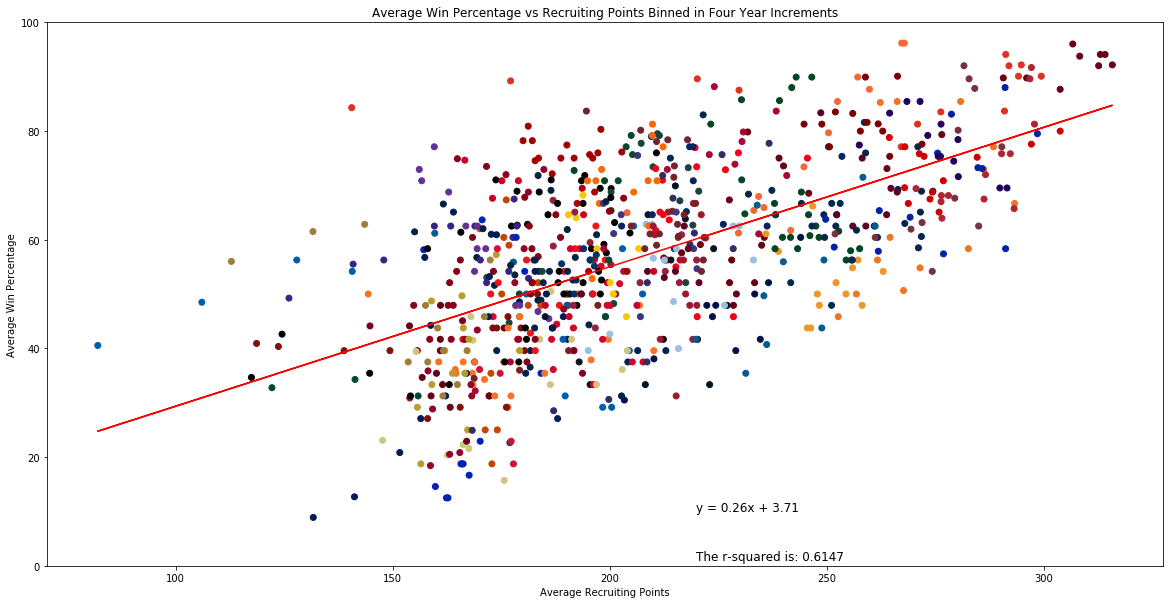

In [8]:
# create scatter/line plot of average win percentage vs average recruiting points binned in four year increments
xvalues = groupedBinStats['avgPoints']
yvalues = groupedBinStats['avgWinPct']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xvalues, yvalues)
regress_values = xvalues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,10))
plt.scatter(xvalues,yvalues,color=groupedBinStats['color'])
plt.plot(xvalues,regress_values,"r-")
plt.annotate(line_eq,(220,10),fontsize=12,color="black")
plt.annotate(f"The r-squared is: {round(rvalue,4)}",(220,1),fontsize=12,color="black")
plt.title('Average Win Percentage vs Recruiting Points Binned in Four Year Increments')
plt.xlabel('Average Recruiting Points')
plt.ylabel('Average Win Percentage')
plt.ylim(0,100)
# save figure
plt.savefig("Figures/AverageWinPctVsRecruitingPtsBinned.png")

In [9]:
# get top two and bottom two performing teams from each conference that have been there all the years
groupedStatsTime = groupedStats[groupedStats['numSeasons']==16]

groupedStatsTime = groupedStatsTime.sort_values(by=['conference','avgWinPct'])
confGrouped = groupedStatsTime.groupby('conference')

confBestWorstTeams = pd.concat([confGrouped.head(2),confGrouped.tail(2)])
confBestWorstTeams = confBestWorstTeams.sort_values(by=['conference','avgWinPct'])
confBestWorstTeams = confBestWorstTeams[['team','conference']]

confBestWorst = pd.merge(confBestWorstTeams,comboFrame,on=['conference','team'],how='inner')
confBestWorst

,team,conference,season,id,mascot,abbreviation,division,color,recruitingRank,recruitingPoints,games,wins,losses,ties,winPct,bin1,bin2,bin3,bin4
0,Duke,ACC,2004,150,Blue Devils,DUKE,NaN,#001A57,67.0,107.79,11,2,9,0,18.181818,2004-2007,NaN,NaN,NaN
1,Duke,ACC,2005,150,Blue Devils,DUKE,Coastal,#001A57,55.0,140.17,11,1,10,0,9.090909,2004-2007,2005-2008,NaN,NaN
2,Duke,ACC,2006,150,Blue Devils,DUKE,Coastal,#001A57,51.0,152.48,12,0,12,0,0.000000,2004-2007,2005-2008,2006-2009,NaN
3,Duke,ACC,2007,150,Blue Devils,DUKE,Coastal,#001A57,77.0,126.41,12,1,11,0,8.333333,2004-2007,2005-2008,2006-2009,2007-2010
4,Duke,ACC,2008,150,Blue Devils,DUKE,Coastal,#001A57,67.0,145.79,12,4,8,0,33.333333,2008-2011,2005-2008,2006-2009,2007-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,Alabama,SEC,2015,333,Crimson Tide,ALA,West,#690014,1.0,311.10,13,12,1,0,92.307692,2012-2015,2013-2016,2014-2017,2015-2018
316,Alabama,SEC,2016,333,Crimson Tide,ALA,West,#690014,1.0,302.04,13,13,0,0,100.000000,2016-2019,2013-2016,2014-2017,2015-2018
317,Alabama,SEC,2017,333,Crimson Tide,ALA,West,#690014,1.0,323.87,12,11,1,0,91.666667,2016-2019,NaN,2014-2017,2015-2018
318,Alabama,SEC,2018,333,Crimson Tide,ALA,West,#690014,5.0,289.94,13,13,0,0,100.000000,2016-2019,NaN,NaN,2015-2018


Done with ACC
Done with Big 12
Done with Big Ten
Done with Pac-12
Done with SEC


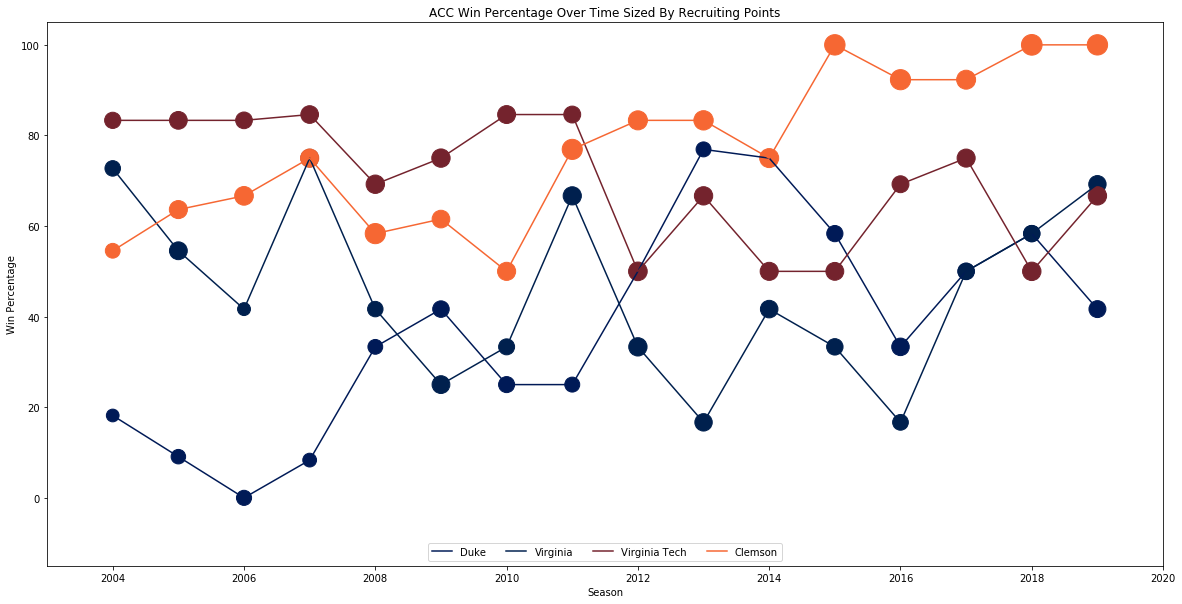

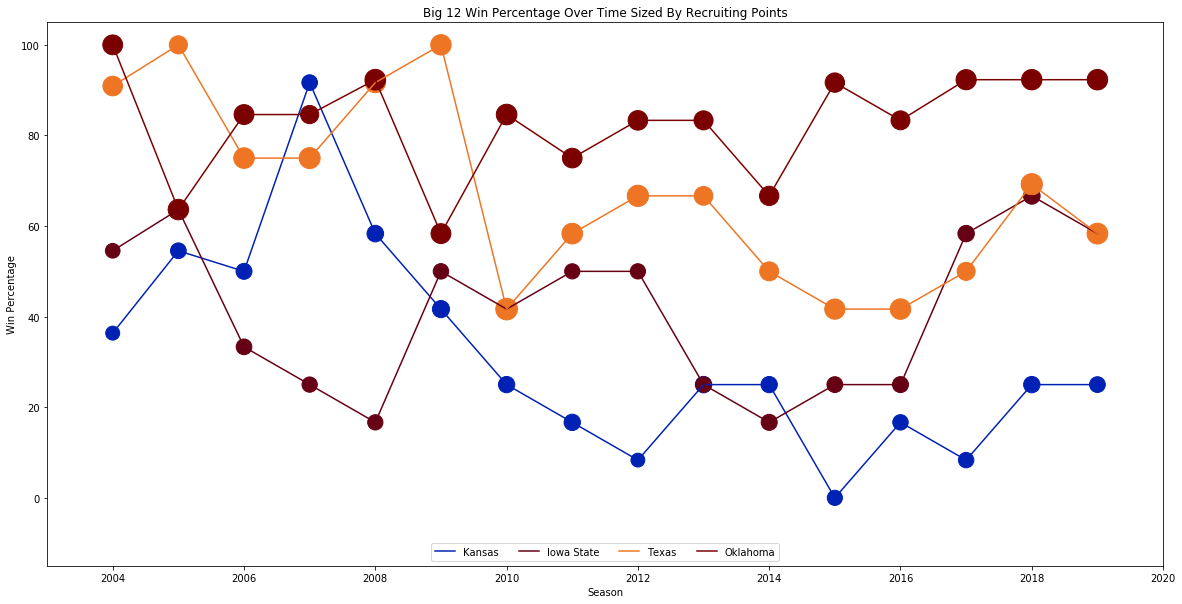

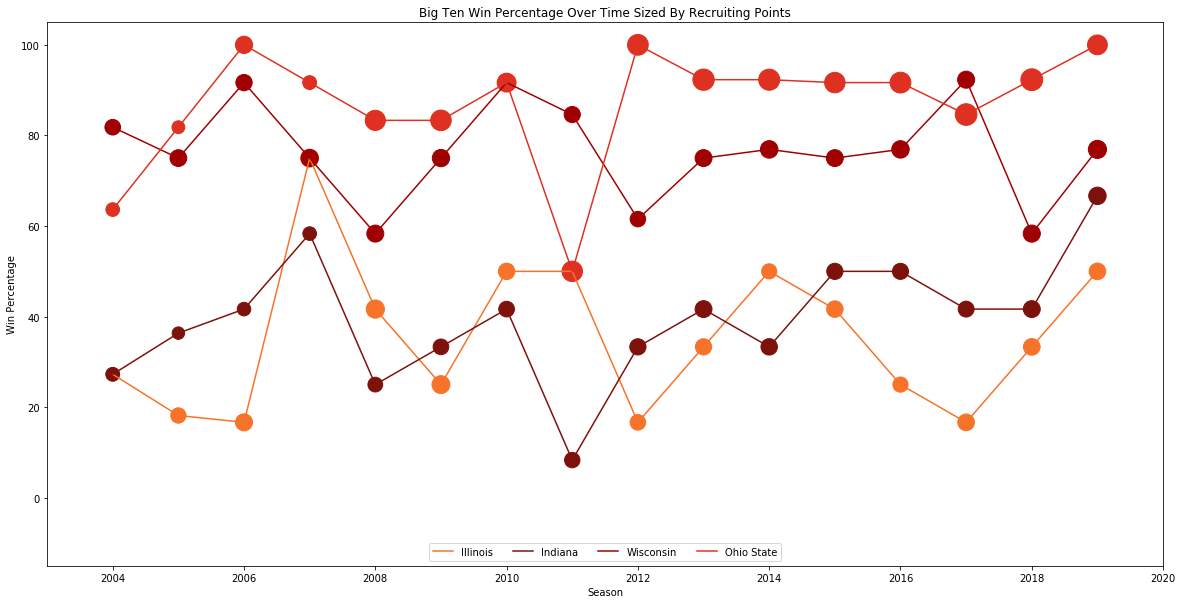

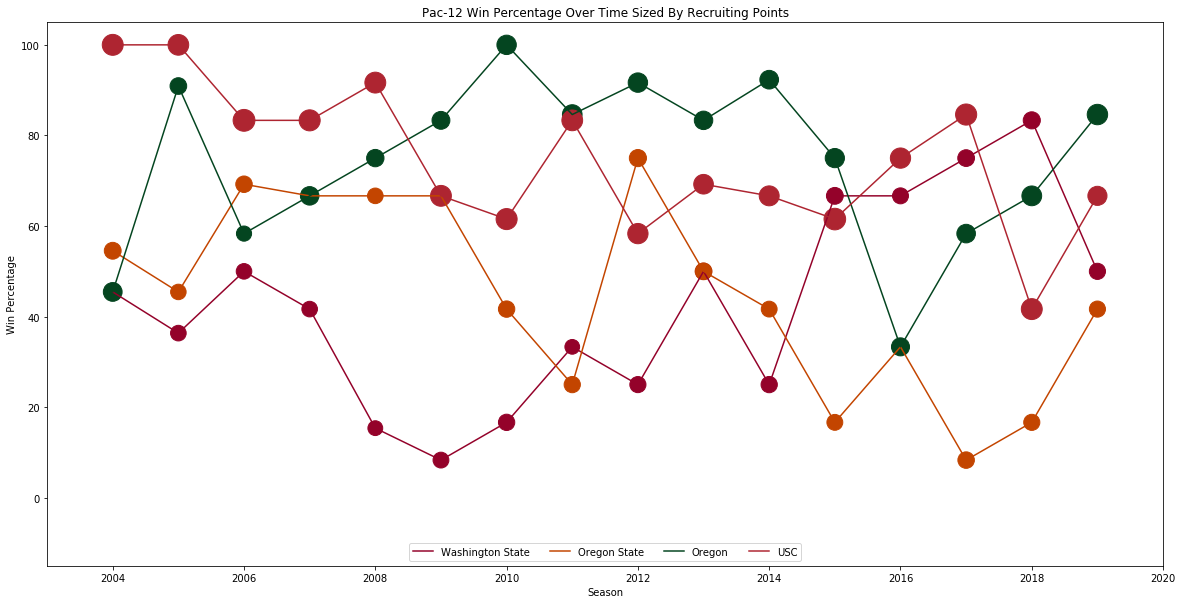

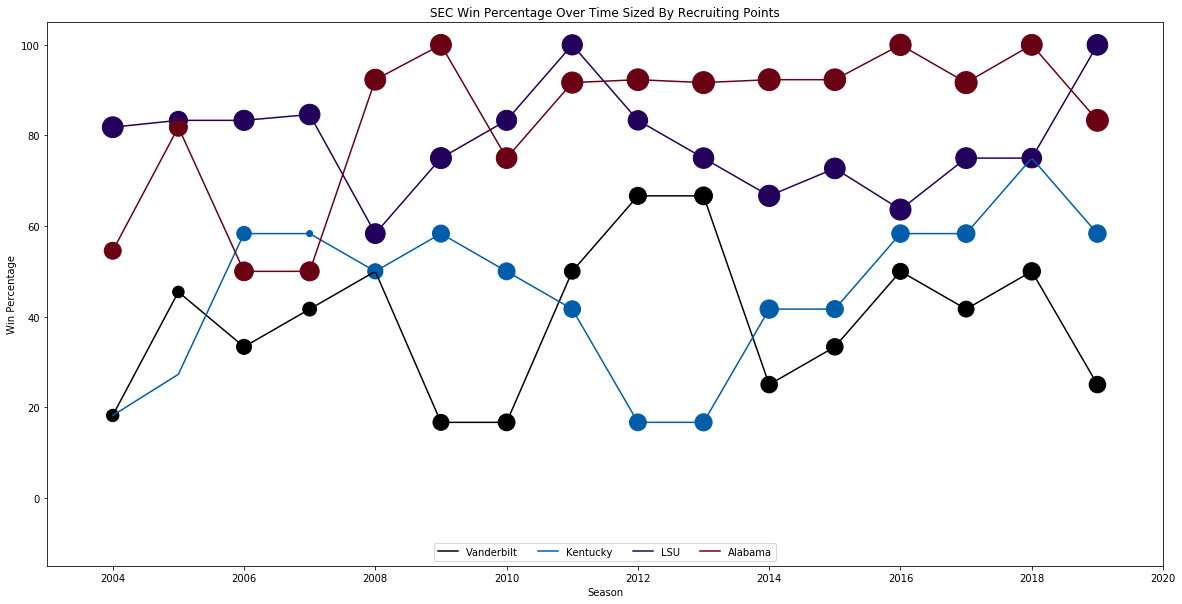

In [10]:
# create figure of win percentage over time by conference using recruiting rank as the size
for c in confBestWorst['conference'].unique():
    confframe = confBestWorst[confBestWorst['conference'] == c]
    fig,ax = plt.subplots()
    for team in confframe['team'].unique():
        subframe = confframe[confframe['team']==team]
        xvalues = subframe['season']
        yvalues = subframe['winPct']
        sizes = [s * 1.5 for s in subframe['recruitingPoints']]
        colors = str(subframe['color'].unique()[0])    
        ax.scatter(xvalues,yvalues, s=sizes, color=colors)
        ax.plot(xvalues,yvalues,color=colors, label=team)
        
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.title(f"{c} Win Percentage Over Time Sized By Recruiting Points")
    plt.xlabel("Season")
    plt.ylabel("Win Percentage")
    plt.ylim(-15,105)
    plt.xlim(2003,2020)
    plt.legend(loc='lower center',ncol=4)
    plt.savefig(f"Figures/{c}WinPctOverTimeRecruiting")
    print(f"Done with {c}")

Done with ACC
Done with Big 12
Done with Big Ten
Done with Pac-12
Done with SEC


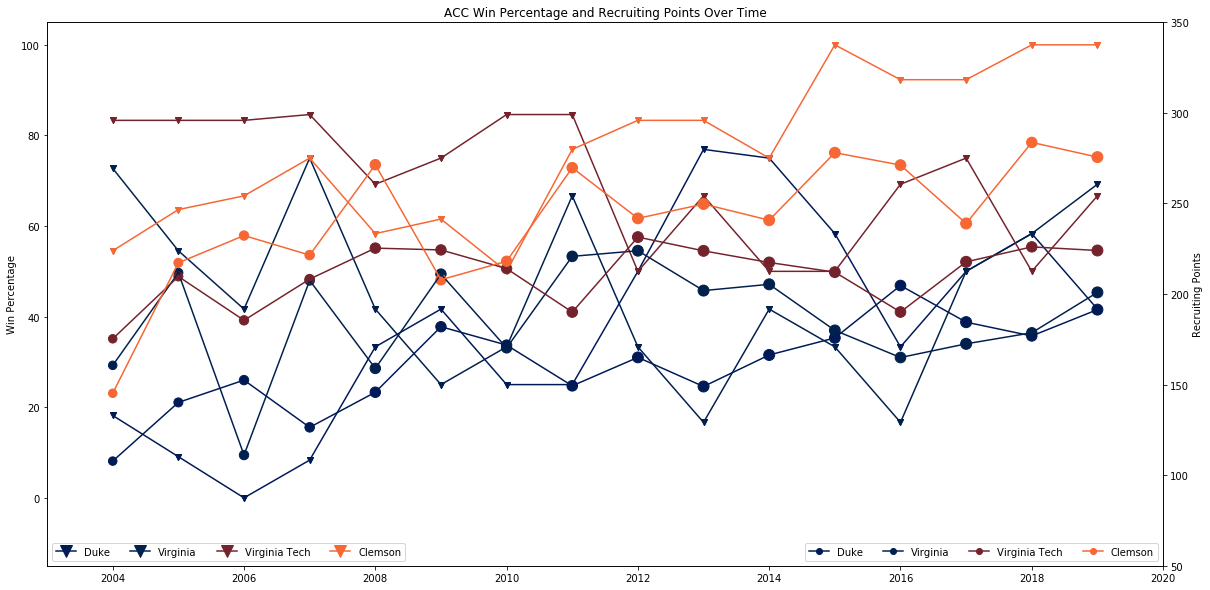

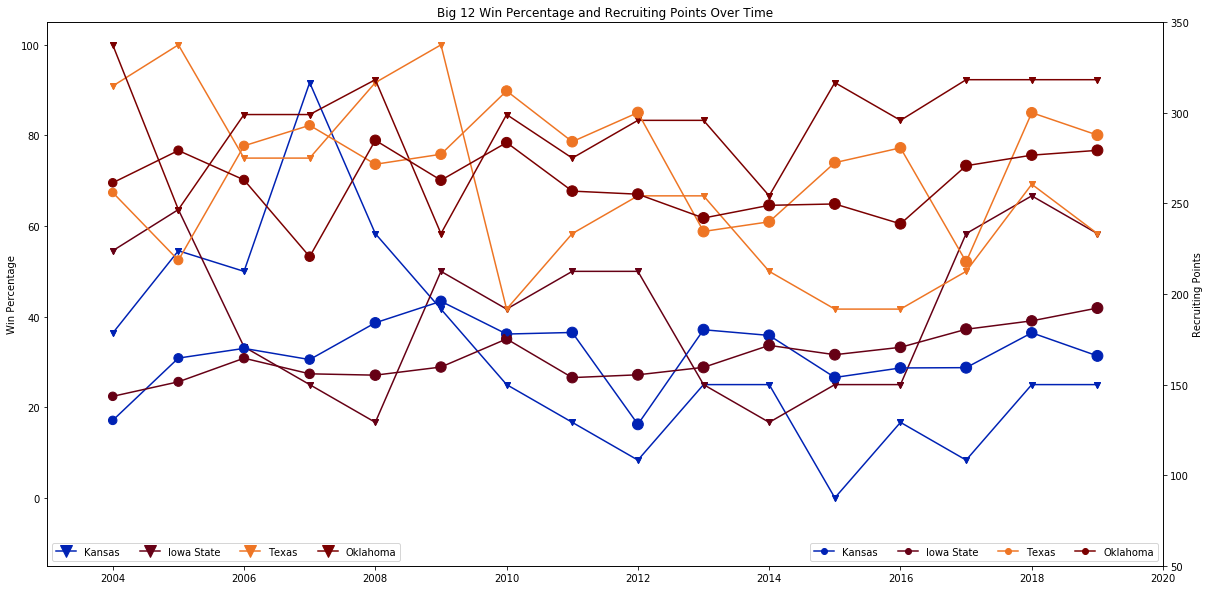

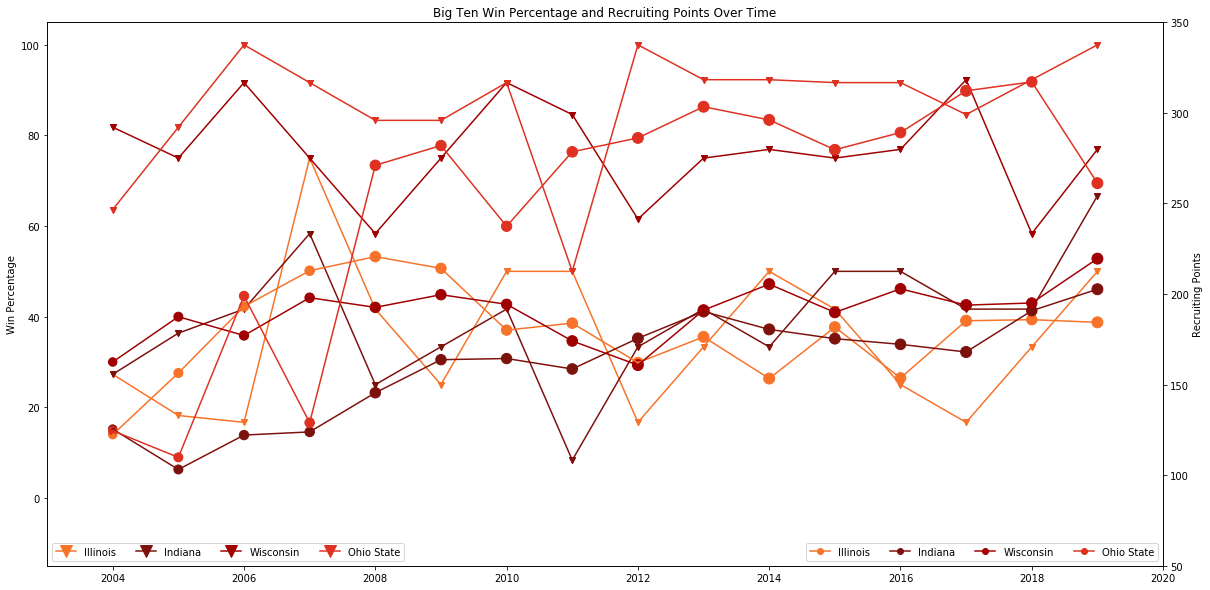

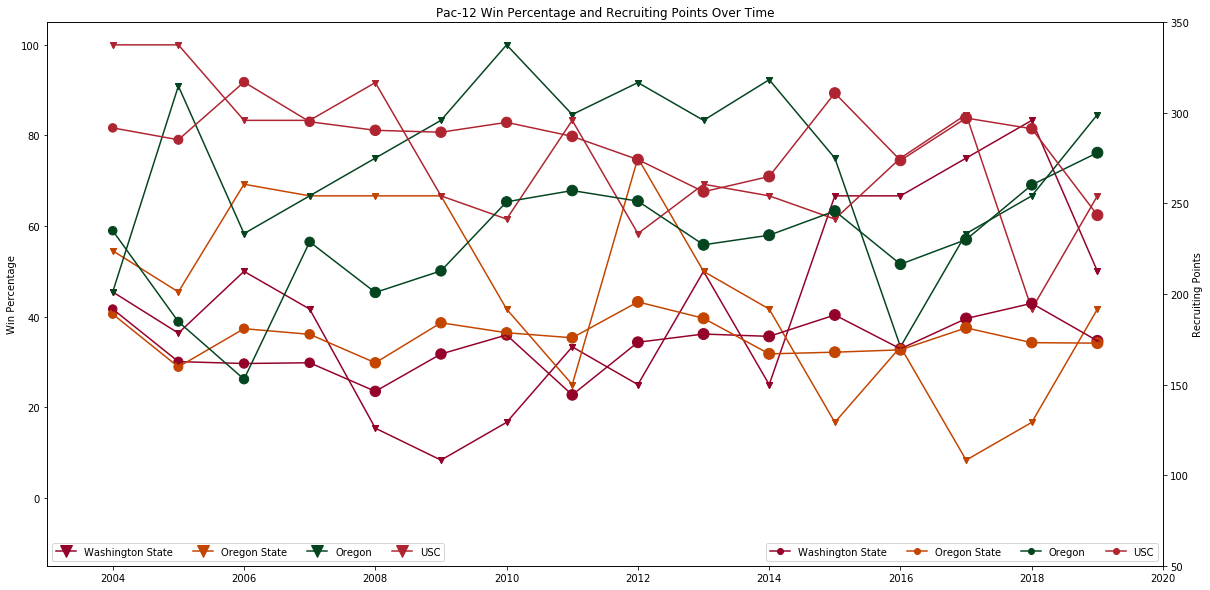

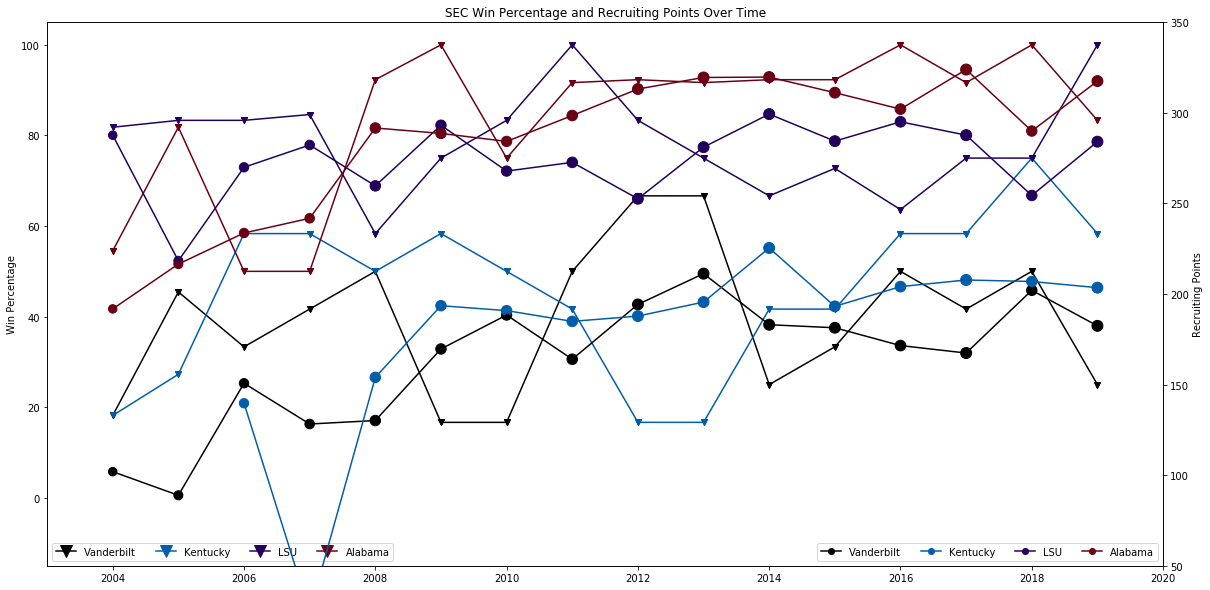

In [11]:
# create figure of win percentage and recruiting rank over time by conference
for c in confBestWorst['conference'].unique():
    confframe = confBestWorst[confBestWorst['conference'] == c]
    fig,ax1 = plt.subplots()
    for team in confframe['team'].unique():
        subframe = confframe[confframe['team']==team]
        xvalues = subframe['season']
        yvalues = subframe['winPct']
        colors = str(subframe['color'].unique()[0])    
        ax1.scatter(xvalues,yvalues, color=colors, marker='v')
        ax1.plot(xvalues,yvalues,color=colors, label=team, marker='v')
        
    ax2 = ax1.twinx() 
    
    for team in confframe['team'].unique():
        subframe = confframe[confframe['team']==team]
        xvalues = subframe['season']
        yvalues = subframe['recruitingPoints']
        colors = str(subframe['color'].unique()[0])    
        ax2.scatter(xvalues,yvalues, s=sizes, color=colors, marker='.')
        ax2.plot(xvalues,yvalues,color=colors, label=team, marker='.')
        
    ax1.set_ylabel("Win Percentage")
    ax1.set_ylim(-15,105)
    ax2.set_ylabel("Recruiting Points")
    ax2.set_ylim(50,350)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    plt.title(f"{c} Win Percentage and Recruiting Points Over Time")
    plt.xlabel("Season")
    plt.xlim(2003,2020)
    ax1.legend(loc='lower left',ncol=4, markerscale=2.0)
    ax2.legend(loc='lower right',ncol=4, markerscale=2.0)
    plt.savefig(f"Figures/{c}WinPctAndRecruitingbOverTime")
    print(f"Done with {c}")